In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import random
from tqdm.notebook import tqdm
import cv2

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
height, width = 128, 128
#min, max = 20,30

[(8, 111, 80, 28, 28), (8, 36, 41, 28, 28)]


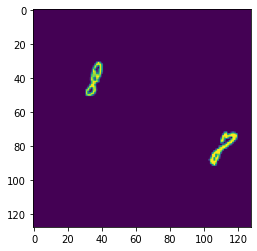

In [6]:
def make_img(x_array, y_array, height, width):
  new_img = np.zeros([height, width])
  mask = np.zeros([height, width])
  old_height = int(x_array.shape[1]/2)
  old_width = int(x_array.shape[2]/2)
  all_num = 2
  num = 0
  labels = []
  while num < all_num:
    x_shift = random.randint(old_width, width-old_width)
    y_shift = random.randint(old_height, width-old_height)
    idx = random.randint(0, x_array.shape[0]-1)
    if (mask[y_shift-old_height: y_shift+old_height, 
             x_shift-old_height: x_shift+old_height]==0).all():

      new_img[y_shift-old_height: y_shift+old_height, 
              x_shift-old_height: x_shift+old_height] = x_array[idx]

      mask[y_shift-old_height: y_shift+old_height, 
           x_shift-old_height: x_shift+old_height] = 1
           
      labels.append((y_array[idx], x_shift, y_shift, 28, 28))
      num +=1
  return new_img, labels

s = make_img(x_train, y_train, height, width)
plt.imshow(s[0])
print(s[1])

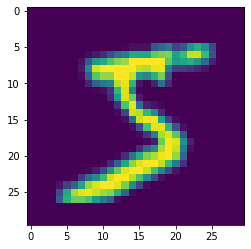

In [ ]:
plt.imshow(cv2.resize(np.uint8(x_train[0]),(30,30)))

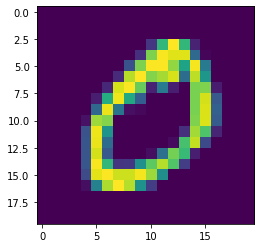

In [ ]:
plt.imshow(cv2.resize(np.uint8(x_train[1]),(20,20)))

[(4, 97, 25, 28, 28), (7, 114, 99, 28, 28)]


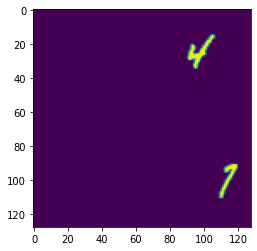

In [ ]:
def make_img(x_array, y_array, height, width):
  new_img = np.zeros([height, width])
  mask = np.zeros([height, width])
  old_height = int(x_array.shape[1]/2)
  old_width = int(x_array.shape[2]/2)
  all_num = 2
  num = 0
  labels = []
  while num < all_num:
    x_shift = random.randint(old_width, width-old_width)
    y_shift = random.randint(old_height, width-old_height)
    idx = random.randint(0, x_array.shape[0]-1)
    if (mask[y_shift-old_height: y_shift+old_height, 
             x_shift-old_height: x_shift+old_height]==0).all():

      new_img[y_shift-old_height: y_shift+old_height, 
              x_shift-old_height: x_shift+old_height] = x_array[idx]

      mask[y_shift-old_height: y_shift+old_height, 
           x_shift-old_height: x_shift+old_height] = 1
           
      labels.append((y_array[idx], x_shift, y_shift, 28, 28))
      num +=1
  return new_img, labels

s = make_img(x_train, y_train, height, width)
plt.imshow(s[0])
print(s[1])
#plt.gca().add_patch(matplotlib.patches.Rectangle((s[2][0]),28,28, ec='r', fc='none'))

In [7]:
def make_data(x_array, y_array, height, width, sample_number):
    imgs = []
    labels = []
    for i in tqdm(range(sample_number)):
        sample = make_img(x_array, y_array, height, width)
        imgs.append(sample[0])
        labels.append(sample[1])
    imgs = np.array(imgs)
    imgs = imgs.reshape(-1, height, width, 1)
    imgs = imgs/255
    labels = np.array(labels)
    return imgs, labels

In [8]:
imgs, labels = make_data(x_train, y_train, height, width, 40000)

In [ ]:
labels[1]

[(4, 35, 35, 28, 28), (6, 38, 101, 28, 28)]

In [9]:
#the sample is a square
#test parameters

#height, width = 128, 128
stride = 10
size = 28
padding = 4
n_rows = 10
n_cols = 10

dist_threshold = 20

#formula to big padding
big_padding = int((((size+2*padding)+stride*n_rows)-height)/2)

print("sample size with padding: ", height+2*big_padding)
print("box size with padding: ", size+2*padding)
print("stride: ", stride)
print("number of iteration in rows/cols: ", n_rows)

sample size with padding:  136
box size with padding:  36
stride:  10
number of iteration in rows/cols:  10


In [10]:
from math import sqrt

def kardashian_dist(labels, h, w):
    # 1. get coords
    # 2. count distance
    # 3. return smallest distance
    distances = []
    # example labels:
    # [(3, 22, 31, 28, 28), (9, 81, 46, 28, 28)]
    for i, label in enumerate(labels):
        x = label[1]
        y = label[2]
        # a^2 + b^2 = c^2
        # c = sqrt(a^2 + b^2)
        distance = sqrt((h - y)**2 + (w - x)**2)
        distances.append((i, distance))
    distances.sort(key=lambda x: x[1])

    return distances[0]

In [11]:
def  random_labels():
    #(0, 66, 81, 28, 28)
    return (random.randint(0,9), random.randint(size/2, height-size/2), 
            random.randint(size/2, width-size/2), 28, 28)

In [12]:
random_labels()

(5, 54, 81, 28, 28)

In [13]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import mse

In [14]:
from tensorflow.keras.optimizers import Adam
opt = Adam()

In [97]:
def step(X, y, debug=False):
    for row in range(n_rows):
        for col in range(n_cols):
            # x and y of the middle of our slice
            ybox = (size+2*padding)/2+stride*row
            xbox = (size+2*padding)/2+stride*col

            distance = kardashian_dist(y, ybox, xbox)
            sliced_X = X[row*stride: row*stride+36, col*stride: col*stride+36, :]
            


            if dist_threshold >= distance[1]:
                flag = np.array([1,0]).reshape(1,2)
                label = y[distance[0]]

            else:
                flag = np.array([0,1]).reshape(1,2)
                label = random_labels()

            with tf.GradientTape() as tape:
                coor = np.array([xbox, ybox]).reshape(1,2)
                inputs = {'inp': sliced_X.reshape(1, 36, 36, 1),'coor': coor}
                pred = model(inputs)
                #pred = model(sliced_X.reshape(1, 36, 36, 1), [[xbox, ybox]])
                confidence_loss = binary_crossentropy(flag, pred[1])
                if pred[1][0][0] >= 0.5:
                    clfs_loss = sparse_categorical_crossentropy(label[0], pred[0])
                    mse_loss = mse(label[1:], pred[2])
                    grads = tape.gradient([clfs_loss, confidence_loss, mse_loss], model.trainable_variables)
                    opt.apply_gradients(zip(grads, model.trainable_variables))
                else:
                    grads = tape.gradient(confidence_loss, model.trainable_variables)
                    opt.apply_gradients(zip(grads, model.trainable_variables))  
            if debug:
                print(f"Sliced image shape: {sliced_X.shape}")
                print(f"confidence true: {flag[0][0]} pred: {pred[1]} loss: {confidence_loss}")
                print("------------------------------------------------------------")
                print(f"clfs true: {label[0]} pred: {pred[0]} loss: {sparse_categorical_crossentropy(label[0], pred[0])}")
                print("------------------------------------------------------------")
                print(f"mse true: {label[1:]}")
                print(f"mse pred: {pred[2]} loss {mse(label[1:], pred[2])}")
                plt.imshow(sliced_X.reshape(36,36))
                plt.show()

In [106]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00220883 0.9977912 ]] loss: [0.04601363]
------------------------------------------------------------
clfs true: 1 pred: [[0.02165593 0.03839926 0.14465414 0.05820159 0.14320447 0.13129982
  0.11970708 0.09236818 0.16425307 0.08625641]] loss: [3.259717]
------------------------------------------------------------
mse true: (31, 20, 28, 28)
mse pred: [[9.565867   6.26839    0.19196464 0.66350824]] loss [542.13745]


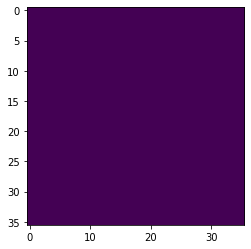

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00335662 0.9966434 ]] loss: [0.05643655]
------------------------------------------------------------
clfs true: 8 pred: [[0.02418398 0.04132634 0.14304169 0.06160122 0.14129794 0.12873003
  0.11924189 0.09300549 0.1589546  0.08861683]] loss: [1.8391366]
------------------------------------------------------------
mse true: (79, 83, 28, 28)
mse pred: [[11.880158    8.917971   -0.56533194 -0.09153078]] loss [2899.5833]


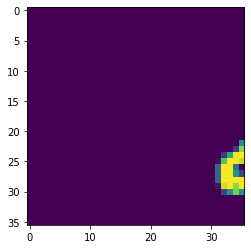

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.02754344 0.9724566 ]] loss: [1.9375925]
------------------------------------------------------------
clfs true: 9 pred: [[0.03861216 0.05194982 0.15016322 0.06913631 0.13170585 0.10338987
  0.11013727 0.09532014 0.13966641 0.10991899]] loss: [2.2080116]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[14.064212   11.710627   -1.5949223  -0.89532137]] loss [781.94507]


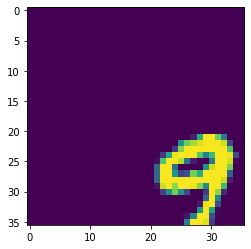

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.1753401 0.8246599]] loss: [1.1533201]
------------------------------------------------------------
clfs true: 9 pred: [[0.05831632 0.06337672 0.15640548 0.07058973 0.11723772 0.08488503
  0.09924422 0.096942   0.12008765 0.13291518]] loss: [2.018044]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[16.339617  14.518236  -2.5913806 -1.6306295]] loss [749.4862]


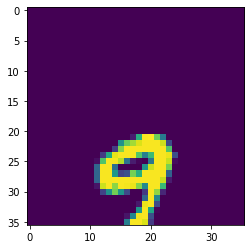

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.04887684 0.9511232 ]] loss: [1.6885133]
------------------------------------------------------------
clfs true: 9 pred: [[0.04463915 0.05614751 0.14920382 0.06984183 0.12597585 0.10201895
  0.10695323 0.09690357 0.1319418  0.11637425]] loss: [2.150944]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[18.798544  17.006598  -3.0021548 -2.327517 ]] loss [713.618]


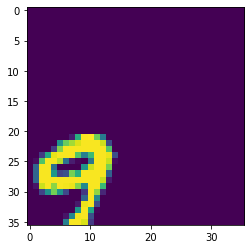

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00490854 0.99509144]] loss: [0.06791364]
------------------------------------------------------------
clfs true: 3 pred: [[0.02657775 0.04365983 0.14247838 0.06383313 0.1395131  0.12654313
  0.11810223 0.09336331 0.15404654 0.09188262]] loss: [2.751483]
------------------------------------------------------------
mse true: (73, 59, 28, 28)
mse pred: [[21.409521  19.40813   -3.1305976 -2.98228  ]] loss [1539.5275]


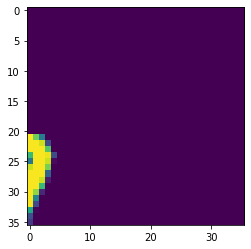

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.0028574 0.9971426]] loss: [0.05218283]
------------------------------------------------------------
clfs true: 0 pred: [[0.02299316 0.03988643 0.14452432 0.06002986 0.14223343 0.12958537
  0.1189356  0.0925784  0.16117176 0.08806166]] loss: [3.7725582]
------------------------------------------------------------
mse true: (79, 28, 28, 28)
mse pred: [[23.909203  21.960289  -3.553701  -3.6624825]] loss [1267.4056]


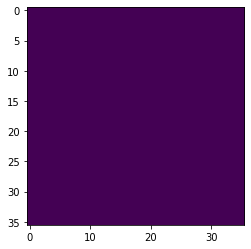

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00327364 0.9967264 ]] loss: [0.05576363]
------------------------------------------------------------
clfs true: 8 pred: [[0.02369434 0.04062638 0.14444879 0.06090299 0.14180602 0.12860867
  0.11858703 0.09271338 0.15957576 0.08903658]] loss: [1.8352364]
------------------------------------------------------------
mse true: (112, 80, 28, 28)
mse pred: [[26.286066  24.584442  -4.2036724 -4.388758 ]] loss [3125.9678]


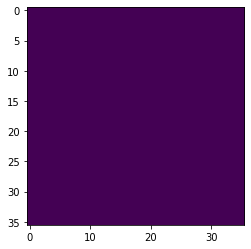

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00368899 0.996311  ]] loss: [0.05910618]
------------------------------------------------------------
clfs true: 7 pred: [[0.02432635 0.04128732 0.14454216 0.06147757 0.14111617 0.12781118
  0.11819156 0.09296298 0.15853287 0.08975182]] loss: [2.3755538]
------------------------------------------------------------
mse true: (36, 97, 28, 28)
mse pred: [[28.667145  27.206219  -4.8461504 -5.114824 ]] loss [1775.1008]


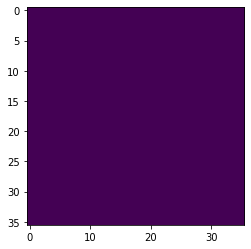

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00407178 0.9959282 ]] loss: [0.06201602]
------------------------------------------------------------
clfs true: 9 pred: [[0.0248652  0.04184899 0.14462288 0.06194098 0.14050135 0.12716413
  0.11784697 0.09317983 0.15770233 0.09032743]] loss: [2.404314]
------------------------------------------------------------
mse true: (35, 36, 28, 28)
mse pred: [[31.05109   29.826077  -5.4832335 -5.839735 ]] loss [579.99146]


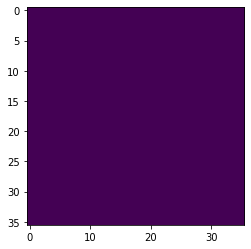

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00445134 0.9955487 ]] loss: [0.06476284]
------------------------------------------------------------
clfs true: 4 pred: [[0.0253521  0.04233661 0.14473435 0.06232684 0.13997327 0.12649405
  0.11749095 0.09341462 0.15689044 0.09098675]] loss: [1.9663038]
------------------------------------------------------------
mse true: (96, 48, 28, 28)
mse pred: [[11.610961    7.462997   -0.55274796  1.3236108 ]] loss [2572.9119]


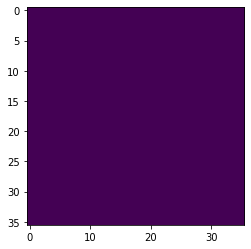

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.01157303 0.988427  ]] loss: [2.3264914]
------------------------------------------------------------
clfs true: 9 pred: [[0.03131678 0.04697238 0.1488616  0.06623225 0.13477214 0.11370194
  0.11298566 0.09447357 0.14907148 0.10161223]] loss: [2.2865913]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[13.908892   10.156397   -1.3402927   0.56444424]] loss [773.5401]


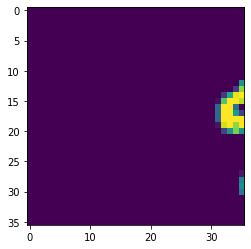

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.29814723 0.70185274]] loss: [0.92993766]
------------------------------------------------------------
clfs true: 9 pred: [[0.06326031 0.0649481  0.16329353 0.07042337 0.11201999 0.07495544
  0.09430197 0.09591556 0.117533   0.14334872]] loss: [1.942475]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[16.07086    13.090379   -2.5731244  -0.23764603]] loss [743.46185]


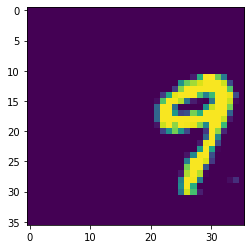

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.5694044  0.43059558]] loss: [0.6258831]
------------------------------------------------------------
clfs true: 9 pred: [[0.08253282 0.0823436  0.14886102 0.07589319 0.10523516 0.07221781
  0.08950496 0.09477587 0.10879029 0.13984522]] loss: [1.967219]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[18.403042  15.783617  -3.5335433 -1.0261035]] loss [715.5247]


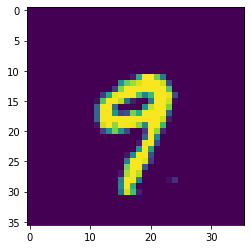

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.35126078 0.6487392 ]] loss: [0.85824573]
------------------------------------------------------------
clfs true: 9 pred: [[0.06647112 0.06766333 0.16097896 0.07137482 0.10999531 0.08084266
  0.09165768 0.09298391 0.10973477 0.14829741]] loss: [1.9085355]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[21.175125  18.702381  -3.5356739 -1.2674271]] loss [664.27515]


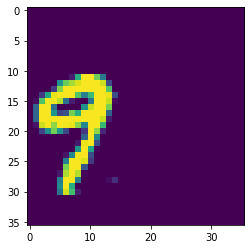

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.03490539 0.96509457]] loss: [1.8340223]
------------------------------------------------------------
clfs true: 9 pred: [[0.03657195 0.04856075 0.1631505  0.06369089 0.12914015 0.10491964
  0.10314088 0.0927096  0.13884026 0.1192754 ]] loss: [2.1263204]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[23.8725    21.06584   -3.4407725 -1.8530535]] loss [627.48645]


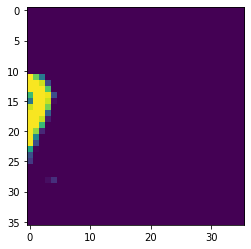

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.01386928 0.9861308 ]] loss: [0.11223668]
------------------------------------------------------------
clfs true: 6 pred: [[0.02841537 0.04164036 0.16788189 0.05847301 0.13484938 0.1110334
  0.10475311 0.09077149 0.15072006 0.111462  ]] loss: [2.256149]
------------------------------------------------------------
mse true: (77, 69, 28, 28)
mse pred: [[26.471346  23.613382  -3.6888287 -2.4637976]] loss [1636.3289]


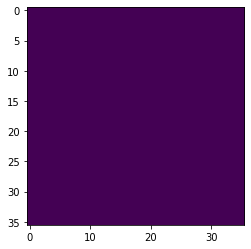

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.01733229 0.98266774]] loss: [0.12492542]
------------------------------------------------------------
clfs true: 3 pred: [[0.02906354 0.04107859 0.17365651 0.05717339 0.13362977 0.10651819
  0.10195376 0.09070771 0.15058553 0.11563301]] loss: [2.8616667]
------------------------------------------------------------
mse true: (18, 105, 28, 28)
mse pred: [[28.932991  26.272903  -4.230148  -3.1174679]] loss [2081.1414]


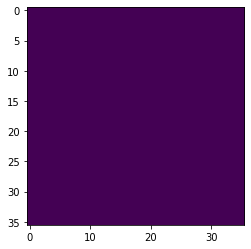

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.02066788 0.9793321 ]] loss: [0.13593212]
------------------------------------------------------------
clfs true: 2 pred: [[0.02948975 0.04045007 0.17888916 0.05592581 0.13256687 0.10281996
  0.09950861 0.09055466 0.15059629 0.11919887]] loss: [1.7209889]
------------------------------------------------------------
mse true: (72, 27, 28, 28)
mse pred: [[31.394003  28.929024  -4.7691126 -3.772416 ]] loss [933.9673]


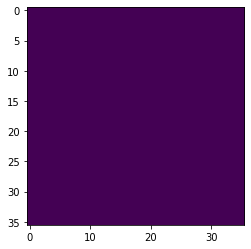

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.023628   0.97637194]] loss: [0.14492744]
------------------------------------------------------------
clfs true: 9 pred: [[0.0297508  0.0398364  0.18357705 0.05467583 0.13157497 0.09996761
  0.09745607 0.09032825 0.15062435 0.12220872]] loss: [2.1020248]
------------------------------------------------------------
mse true: (109, 65, 28, 28)
mse pred: [[33.856014 31.58192  -5.305779 -4.427093]] loss [2231.0444]


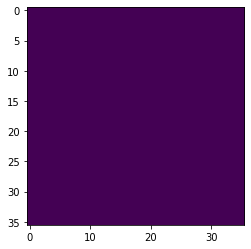

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.02589001 0.97411   ]] loss: [0.1514119]
------------------------------------------------------------
clfs true: 6 pred: [[0.02979757 0.03918853 0.1877143  0.05349486 0.13079017 0.09779799
  0.09572785 0.09006021 0.15087247 0.12455602]] loss: [2.346246]
------------------------------------------------------------
mse true: (33, 35, 28, 28)
mse pred: [[14.19108    8.942229  -0.646537   2.4626899]] loss [626.39026]


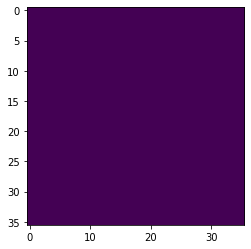

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.03610577 0.96389425]] loss: [0.17731988]
------------------------------------------------------------
clfs true: 5 pred: [[0.03184255 0.04011095 0.1914688  0.0539851  0.1280688  0.09292455
  0.09314433 0.08958515 0.14867201 0.13019781]] loss: [2.3759675]
------------------------------------------------------------
mse true: (69, 55, 28, 28)
mse pred: [[16.606028  11.617622  -1.2492977  1.7808504]] loss [1542.5311]


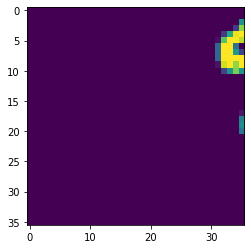

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.2910784  0.70892155]] loss: [0.9404054]
------------------------------------------------------------
clfs true: 9 pred: [[0.05176634 0.05177145 0.19898939 0.05699054 0.11101851 0.07081782
  0.0833306  0.08975187 0.12540092 0.16016257]] loss: [1.8315659]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[18.847553  14.493305  -2.2958307  1.0122787]] loss [669.61755]


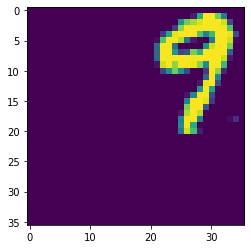

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.49260783 0.5073922 ]] loss: [0.70060146]
------------------------------------------------------------
clfs true: 9 pred: [[0.06486434 0.0636445  0.18386891 0.06211873 0.10990081 0.07100078
  0.07936075 0.09054448 0.11719383 0.15750292]] loss: [1.8483113]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[21.21464    17.19209    -3.1868494   0.28588033]] loss [643.7396]


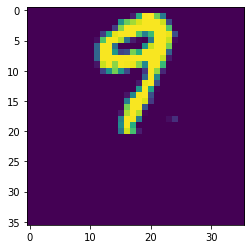

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.29201272 0.70798725]] loss: [0.9390522]
------------------------------------------------------------
clfs true: 9 pred: [[0.0546308  0.0544026  0.18872763 0.05959684 0.11224416 0.07791936
  0.08415115 0.09122594 0.12029449 0.15680707]] loss: [1.8527391]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[23.656023   19.80959    -3.600807   -0.31631246]] loss [615.0342]


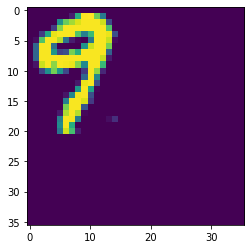

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.06182817 0.9381718 ]] loss: [0.22906084]
------------------------------------------------------------
clfs true: 7 pred: [[0.03438819 0.04032483 0.20044172 0.05163665 0.12465154 0.0878096
  0.08852169 0.0897399  0.14473248 0.13775341]] loss: [2.4108398]
------------------------------------------------------------
mse true: (24, 62, 28, 28)
mse pred: [[26.375713  22.241724  -3.5501175 -0.8835927]] loss [854.00916]


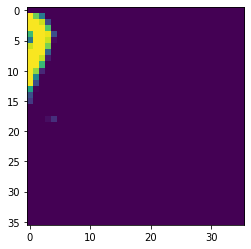

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.05251305 0.94748694]] loss: [0.2121166]
------------------------------------------------------------
clfs true: 7 pred: [[0.03174581 0.03743433 0.20799173 0.04870104 0.12527323 0.0856622
  0.08703811 0.08880705 0.14894865 0.13839787]] loss: [2.4212894]
------------------------------------------------------------
mse true: (110, 68, 28, 28)
mse pred: [[28.900387  24.858133  -3.9569461 -1.518402 ]] loss [2582.7373]


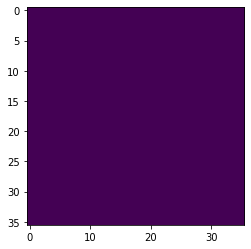

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.05824396 0.941756  ]] loss: [0.22284606]
------------------------------------------------------------
clfs true: 2 pred: [[0.03207832 0.03731869 0.21051435 0.04815531 0.12443975 0.08414455
  0.08597708 0.08864385 0.1485016  0.14022653]] loss: [1.5582014]
------------------------------------------------------------
mse true: (101, 43, 28, 28)
mse pred: [[31.345476  27.510904  -4.517757  -2.1872196]] loss [1765.0844]


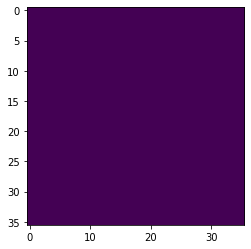

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.06114087 0.93885916]] loss: [0.22807398]
------------------------------------------------------------
clfs true: 8 pred: [[0.032103   0.03708015 0.21247071 0.04765668 0.12399065 0.08324727
  0.08522359 0.08845831 0.14853221 0.14123738]] loss: [1.9069535]
------------------------------------------------------------
mse true: (34, 103, 28, 28)
mse pred: [[33.791782  30.158737  -5.0722675 -2.8564937]] loss [1837.9478]


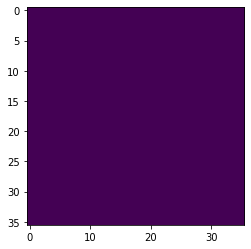

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.06100448 0.9389955 ]] loss: [0.22785178]
------------------------------------------------------------
clfs true: 1 pred: [[0.03184287 0.03673157 0.21390282 0.0472023  0.1239006  0.08291192
  0.0847533  0.08825719 0.14901549 0.14148186]] loss: [3.3041186]
------------------------------------------------------------
mse true: (101, 71, 28, 28)
mse pred: [[36.23927   32.801983  -5.620891  -3.5261579]] loss [1944.3257]


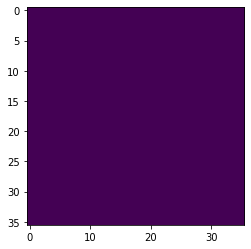

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.05809391 0.9419061 ]] loss: [0.2226317]
------------------------------------------------------------
clfs true: 8 pred: [[0.03132889 0.03628604 0.21484818 0.04678803 0.12413954 0.08308555
  0.08453944 0.08804279 0.14991844 0.14102311]] loss: [1.897664]
------------------------------------------------------------
mse true: (73, 43, 28, 28)
mse pred: [[16.561005   10.1517935  -0.97017664  3.3495727 ]] loss [1427.8198]


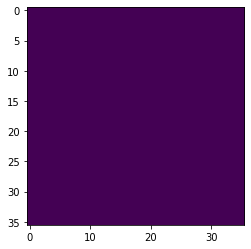

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.05534596 0.94465405]] loss: [0.21756206]
------------------------------------------------------------
clfs true: 7 pred: [[0.03082543 0.03585548 0.21589969 0.04642341 0.12433612 0.08311259
  0.08425403 0.08776626 0.15083377 0.14069319]] loss: [2.4330783]
------------------------------------------------------------
mse true: (113, 73, 28, 28)
mse pred: [[19.009478  12.791505  -1.5131246  2.6788921]] loss [3492.866]


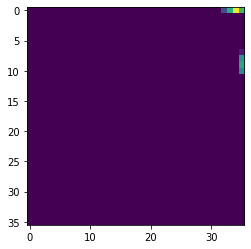

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.10292298 0.89707696]] loss: [0.2923349]
------------------------------------------------------------
clfs true: 2 pred: [[0.03599868 0.03993272 0.21544178 0.04917245 0.11861726 0.07813173
  0.08244096 0.08777146 0.14400211 0.14849079]] loss: [1.5350646]
------------------------------------------------------------
mse true: (28, 52, 28, 28)
mse pred: [[21.335567  15.516861  -2.2771473  1.9381818]] loss [742.8395]


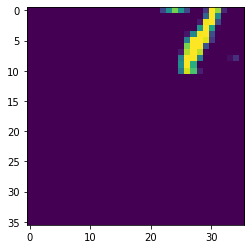

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.14258467 0.8574154 ]] loss: [1.2394885]
------------------------------------------------------------
clfs true: 9 pred: [[0.03968684 0.0427275  0.21219094 0.05064687 0.11670721 0.07820792
  0.08144105 0.0886535  0.13821964 0.15151854]] loss: [1.8870473]
------------------------------------------------------------
mse true: [48 28 28 28]
mse pred: [[23.70836   18.205471  -3.0041125  1.2401615]] loss [590.8401]


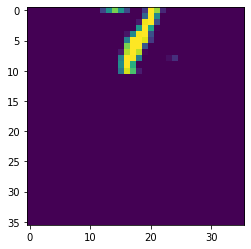

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.0996746  0.90032536]] loss: [0.28773922]
------------------------------------------------------------
clfs true: 0 pred: [[0.03721967 0.04150124 0.20775792 0.05088474 0.12097239 0.08332307
  0.08379654 0.08870684 0.14098875 0.14484893]] loss: [3.290918]
------------------------------------------------------------
mse true: (51, 72, 28, 28)
mse pred: [[26.16137    20.81167    -3.5250962   0.58306056]] loss [1245.6808]


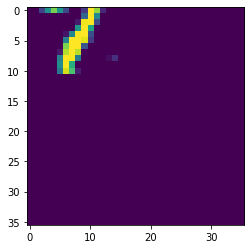

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.0390524 0.9609477]] loss: [0.18436009]
------------------------------------------------------------
clfs true: 0 pred: [[0.02849883 0.03434364 0.21577434 0.04554422 0.12647696 0.08630043
  0.08481944 0.08711194 0.15503803 0.13609214]] loss: [3.5578923]
------------------------------------------------------------
mse true: (82, 59, 28, 28)
mse pred: [[ 2.8785324e+01  2.3338238e+01 -3.7029824e+00 -1.3405107e-02]] loss [1473.3483]


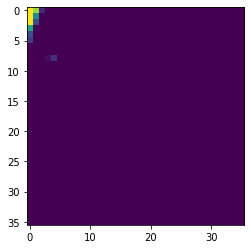

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.03329154 0.9667085 ]] loss: [0.17091686]
------------------------------------------------------------
clfs true: 0 pred: [[0.02741394 0.03357735 0.21604337 0.04501515 0.12735203 0.08734667
  0.08508692 0.08683873 0.15709569 0.13423018]] loss: [3.5967038]
------------------------------------------------------------
mse true: (40, 20, 28, 28)
mse pred: [[31.241093  25.966644  -4.2241826 -0.6826844]] loss [493.3534]


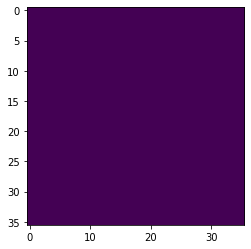

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.02926888 0.97073114]] loss: [0.1607607]
------------------------------------------------------------
clfs true: 7 pred: [[0.02664826 0.03313179 0.21570323 0.04476152 0.12805785 0.08852465
  0.08542619 0.08665622 0.15853898 0.13255131]] loss: [2.4458065]
------------------------------------------------------------
mse true: (79, 72, 28, 28)
mse pred: [[33.687183  28.600578  -4.7661757 -1.3559917]] loss [1468.0394]


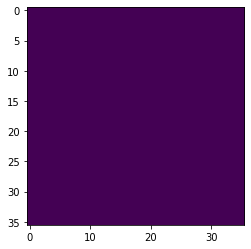

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.02500858 0.97499144]] loss: [0.14915793]
------------------------------------------------------------
clfs true: 4 pred: [[0.02577001 0.0326365  0.21508107 0.04450399 0.12891431 0.09001961
  0.08590599 0.08645    0.16022715 0.13049142]] loss: [2.0486073]
------------------------------------------------------------
mse true: (69, 39, 28, 28)
mse pred: [[36.134262  31.232363  -5.30502   -2.0293026]] loss [787.8691]


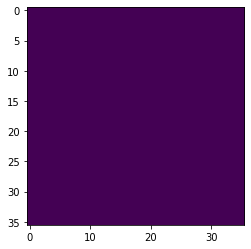

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.02084114 0.9791589 ]] loss: [0.13673662]
------------------------------------------------------------
clfs true: 7 pred: [[0.02480859 0.03209855 0.21417466 0.04424444 0.12991461 0.09180288
  0.08648609 0.08622688 0.16212007 0.12812331]] loss: [2.4507732]
------------------------------------------------------------
mse true: (101, 112, 28, 28)
mse pred: [[38.58219   33.862087  -5.841311  -2.7026181]] loss [3022.35]


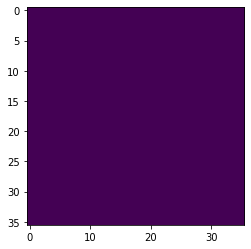

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.01701266 0.9829874 ]] loss: [0.12409377]
------------------------------------------------------------
clfs true: 4 pred: [[0.02379436 0.03152854 0.21303557 0.04397976 0.1310144  0.09382892
  0.08715571 0.08597652 0.16417353 0.12551264]] loss: [2.032448]
------------------------------------------------------------
mse true: (64, 114, 28, 28)
mse pred: [[18.903908  11.20105   -1.1815552  4.1697702]] loss [3505.1812]


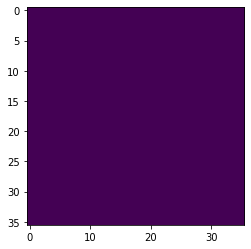

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.03217896 0.967821  ]] loss: [0.16799998]
------------------------------------------------------------
clfs true: 9 pred: [[0.02743548 0.0336065  0.21738994 0.04478642 0.12735426 0.08662412
  0.08462472 0.08620186 0.1577496  0.13422717]] loss: [2.0082216]
------------------------------------------------------------
mse true: (66, 67, 28, 28)
mse pred: [[21.292181  13.902364  -1.8568968  3.4748492]] loss [1577.7662]


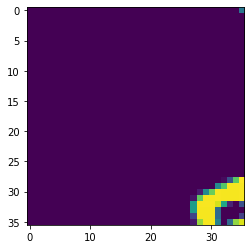

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.12811409 0.8718859 ]] loss: [1.2837815]
------------------------------------------------------------
clfs true: 8 pred: [[0.03740465 0.03924145 0.22401156 0.04606547 0.11779991 0.07358365
  0.07936538 0.08712757 0.14179687 0.15360351]] loss: [1.9533596]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[23.618155  16.686356  -2.7076688  2.7594285]] loss [1379.9779]


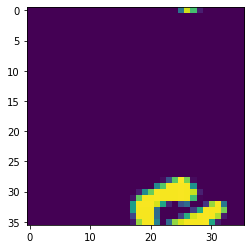

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.16627209 0.8337279 ]] loss: [0.36959362]
------------------------------------------------------------
clfs true: 8 pred: [[0.04045275 0.04105996 0.22271045 0.04658436 0.11504892 0.07255183
  0.07828932 0.08784977 0.13669983 0.15875284]] loss: [1.9899678]
------------------------------------------------------------
mse true: (91, 74, 28, 28)
mse pred: [[26.015251  19.376585  -3.3766387  2.0840018]] loss [2215.7168]


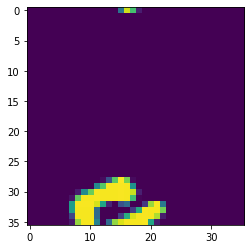

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.04041038 0.95958966]] loss: [0.18705197]
------------------------------------------------------------
clfs true: 6 pred: [[0.02970992 0.03544965 0.21495627 0.04587521 0.1250526  0.08692905
  0.08438278 0.08725955 0.15289643 0.1374886 ]] loss: [2.472392]
------------------------------------------------------------
mse true: (64, 94, 28, 28)
mse pred: [[28.538996  21.878939  -3.6794043  1.4360067]] loss [2042.0403]


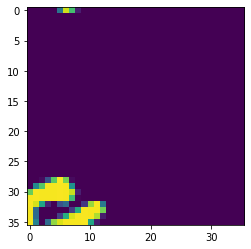

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.01011089 0.9898891 ]] loss: [0.09661122]
------------------------------------------------------------
clfs true: 5 pred: [[0.02156921 0.03031224 0.20958434 0.04342438 0.13346322 0.09941722
  0.0888549  0.08534098 0.16883619 0.11919738]] loss: [2.3084302]
------------------------------------------------------------
mse true: (63, 110, 28, 28)
mse pred: [[31.101618  24.389315  -3.9508407  0.7906845]] loss [2526.9749]


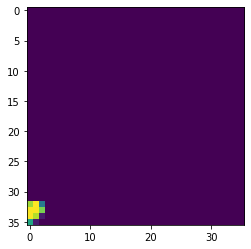

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00674051 0.9932595 ]] loss: [0.07945105]
------------------------------------------------------------
clfs true: 0 pred: [[0.01968129 0.02902572 0.20759532 0.04272728 0.13568492 0.10321369
  0.09002838 0.08460783 0.17324054 0.11419505]] loss: [3.9280868]
------------------------------------------------------------
mse true: (105, 104, 28, 28)
mse pred: [[33.56998    26.997625   -4.4385524   0.12071327]] loss [3215.282]


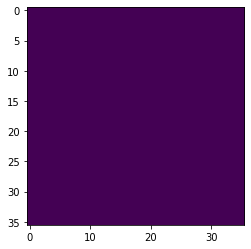

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00565316 0.9943468 ]] loss: [0.07295383]
------------------------------------------------------------
clfs true: 9 pred: [[0.01899411 0.02858664 0.2063729  0.04250965 0.1365381  0.10507312
  0.0905854  0.08433641 0.17487995 0.11212365]] loss: [2.188153]
------------------------------------------------------------
mse true: (20, 48, 28, 28)
mse pred: [[36.014633   29.628845   -4.9796414  -0.55440027]] loss [624.24457]


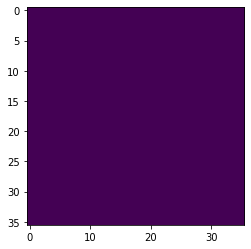

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00470418 0.9952958 ]] loss: [0.0667212]
------------------------------------------------------------
clfs true: 4 pred: [[0.01830492 0.02813905 0.20502917 0.0422891  0.1374252  0.10704692
  0.09116277 0.08405104 0.1765637  0.10998821]] loss: [1.9846754]
------------------------------------------------------------
mse true: (14, 93, 28, 28)
mse pred: [[38.459454  32.25942   -5.520139  -1.2295718]] loss [1566.4126]


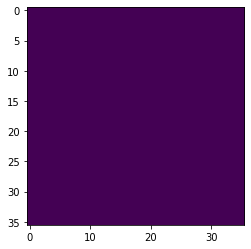

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00389718 0.9961028 ]] loss: [0.0608746]
------------------------------------------------------------
clfs true: 4 pred: [[0.01763862 0.0277264  0.20354174 0.0420424  0.1382814  0.10923177
  0.09178929 0.08375754 0.17818779 0.10780308]] loss: [1.9784644]
------------------------------------------------------------
mse true: (40, 15, 28, 28)
mse pred: [[40.90549   34.889355  -6.0606775 -1.904068 ]] loss [612.6973]


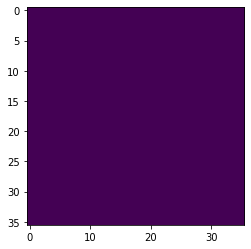

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00408538 0.99591464]] loss: [0.06227241]
------------------------------------------------------------
clfs true: 2 pred: [[0.01789766 0.02793736 0.20386374 0.04222683 0.13816553 0.1084196
  0.09163988 0.08374462 0.17767917 0.10842567]] loss: [1.5903034]
------------------------------------------------------------
mse true: (36, 92, 28, 28)
mse pred: [[21.204817  12.250024  -1.4458693  4.9588075]] loss [1994.228]


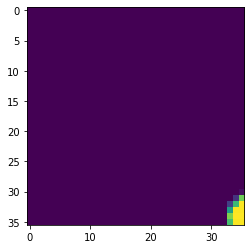

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.04782869 0.95217127]] loss: [1.6979907]
------------------------------------------------------------
clfs true: 8 pred: [[0.03058551 0.03600424 0.22035289 0.04560034 0.12408974 0.08161983
  0.0829313  0.08563045 0.15305164 0.14013399]] loss: [1.8769798]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[23.453978  15.112977  -2.4337263  4.2092505]] loss [1407.5195]


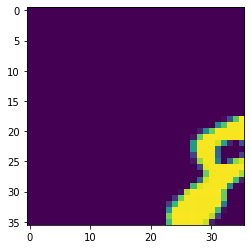

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.48896372 0.51103634]] loss: [0.70426005]
------------------------------------------------------------
clfs true: 8 pred: [[0.05730458 0.05397865 0.21374929 0.05165267 0.11035014 0.06289446
  0.07210146 0.0872058  0.12630498 0.16445793]] loss: [2.0690558]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[25.670439  17.997705  -3.6650121  3.404366 ]] loss [1330.9712]


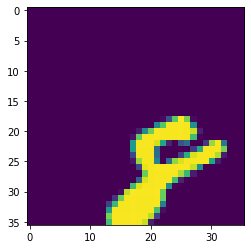

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.51263005 0.48736998]] loss: [0.6806112]
------------------------------------------------------------
clfs true: 8 pred: [[0.0612895  0.05686427 0.2030116  0.05475895 0.10971577 0.06507017
  0.07298774 0.08842105 0.12260433 0.16527668]] loss: [2.098793]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[28.023834  20.67275   -4.3827615  2.712888 ]] loss [1257.3053]


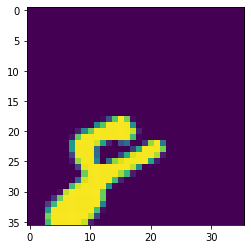

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.07561512 0.9243849 ]] loss: [1.5036075]
------------------------------------------------------------
clfs true: 8 pred: [[0.03202533 0.03693844 0.22081739 0.0450531  0.11691871 0.08265985
  0.0792848  0.08158781 0.15141517 0.15329936]] loss: [1.8877298]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[31.219158  23.7064    -3.6120675  2.796674 ]] loss [1142.6008]


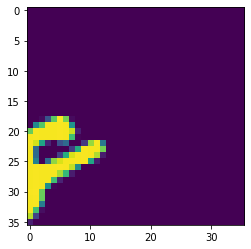

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00365455 0.99634546]] loss: [0.05909026]
------------------------------------------------------------
clfs true: 8 pred: [[0.01483668 0.02427417 0.22113624 0.03738743 0.13000312 0.10656864
  0.08448958 0.07351251 0.19438295 0.11340863]] loss: [1.637925]
------------------------------------------------------------
mse true: (112, 59, 28, 28)
mse pred: [[34.04077   26.128569  -3.3381667  2.3104556]] loss [2200.0513]


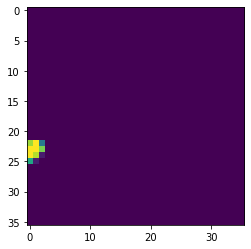

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.0015884  0.99841154]] loss: [0.0393737]
------------------------------------------------------------
clfs true: 1 pred: [[0.01156786 0.02088831 0.2260513  0.03386824 0.12981774 0.11111529
  0.08389205 0.06950679 0.20900771 0.10428479]] loss: [3.8685656]
------------------------------------------------------------
mse true: (89, 98, 28, 28)
mse pred: [[36.66147   28.762516  -3.5576923  1.7586071]] loss [2304.4124]


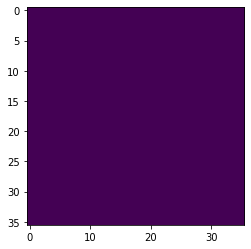

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00136419 0.9986358 ]] loss: [0.03659105]
------------------------------------------------------------
clfs true: 8 pred: [[0.0106769  0.01949326 0.23393773 0.03208772 0.12708807 0.10889167
  0.08206203 0.06738707 0.21485627 0.10351934]] loss: [1.537786]
------------------------------------------------------------
mse true: (21, 27, 28, 28)
mse pred: [[39.201084 31.458696 -3.937052  1.17875 ]] loss [522.62854]


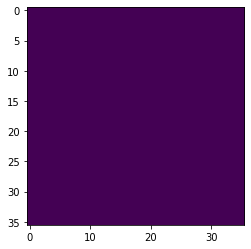

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00119209 0.9988079 ]] loss: [0.03430285]
------------------------------------------------------------
clfs true: 9 pred: [[0.00991459 0.01820808 0.24056308 0.03060498 0.12480187 0.10621084
  0.08070008 0.06574511 0.22057374 0.1026777 ]] loss: [2.2761602]
------------------------------------------------------------
mse true: (77, 100, 28, 28)
mse pred: [[41.736546  34.152912  -4.3186765  0.5911973]] loss [1843.7725]


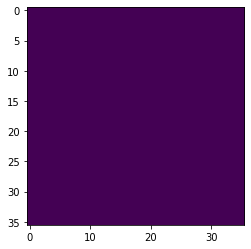

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00104644 0.9989536 ]] loss: [0.03222886]
------------------------------------------------------------
clfs true: 2 pred: [[0.00923943 0.0170961  0.24645615 0.02927015 0.12251504 0.10384621
  0.07949521 0.06412699 0.22621824 0.10173648]] loss: [1.4005712]
------------------------------------------------------------
mse true: (18, 53, 28, 28)
mse pred: [[ 4.4267002e+01  3.6845600e+01 -4.7088752e+00  5.5611134e-05]] loss [701.19684]


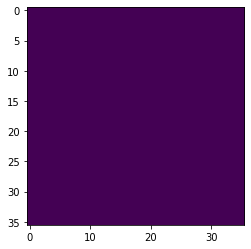

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00240165 0.99759835]] loss: [0.04847803]
------------------------------------------------------------
clfs true: 1 pred: [[0.01077538 0.01783273 0.26103607 0.02966629 0.11754367 0.09148806
  0.07568111 0.06424402 0.21937467 0.11235803]] loss: [4.0267196]
------------------------------------------------------------
mse true: (18, 113, 28, 28)
mse pred: [[24.290648   14.014329   -0.45360216  6.5745745 ]] loss [2776.598]


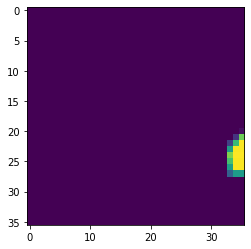

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.1191861 0.8808139]] loss: [1.3146276]
------------------------------------------------------------
clfs true: 8 pred: [[0.02523559 0.02782286 0.28881797 0.03378857 0.09746341 0.05907332
  0.06553683 0.06827886 0.16920345 0.1647791 ]] loss: [1.7766535]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[26.41189   17.044262  -1.7497166  5.7610464]] loss [1296.7799]


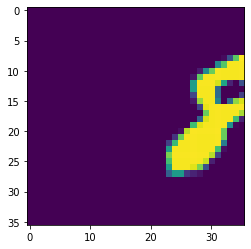

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.6573971  0.34260288]] loss: [0.5438869]
------------------------------------------------------------
clfs true: 8 pred: [[0.05177403 0.05007975 0.2432055  0.04650648 0.09796726 0.05496614
  0.06177633 0.07610331 0.14232758 0.17529362]] loss: [1.9496241]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[28.528309  19.85865   -3.2204816  4.855179 ]] loss [1232.7695]


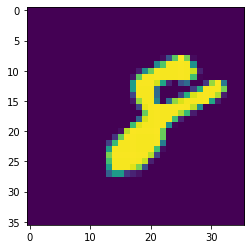

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.40753713 0.59246284]] loss: [0.7923881]
------------------------------------------------------------
clfs true: 8 pred: [[0.03886468 0.03899044 0.24888036 0.0431909  0.09489371 0.06131548
  0.06594907 0.07111239 0.15446433 0.18233867]] loss: [1.867792]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[31.52636   23.186361  -2.8532848  4.9344344]] loss [1117.4006]


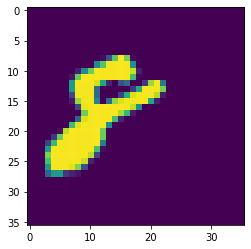

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.00782029 0.99217975]] loss: [2.5083098]
------------------------------------------------------------
clfs true: 8 pred: [[0.01114978 0.01681277 0.2758609  0.02775703 0.10069265 0.07799298
  0.06826986 0.05602667 0.23718694 0.12825042]] loss: [1.4389067]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[34.703236  25.622812  -1.7807225  4.767839 ]] loss [1026.4724]


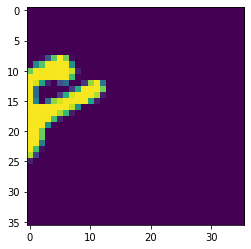

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[6.2380405e-04 9.9937624e-01]] loss: [0.02576365]
------------------------------------------------------------
clfs true: 9 pred: [[0.00448402 0.00868456 0.29430643 0.017943   0.09244409 0.0769143
  0.06049599 0.04316511 0.3023385  0.09922405]] loss: [2.310375]
------------------------------------------------------------
mse true: (14, 50, 28, 28)
mse pred: [[37.79677   28.220537  -1.0503372  4.540568 ]] loss [608.72455]


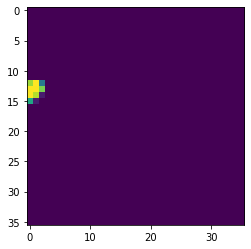

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[3.4608479e-04 9.9965394e-01]] loss: [0.01954015]
------------------------------------------------------------
clfs true: 8 pred: [[0.00326427 0.00667259 0.30519196 0.01486711 0.0851844  0.07170863
  0.05612981 0.03840195 0.3267159  0.09186344]] loss: [1.1186644]
------------------------------------------------------------
mse true: (54, 78, 28, 28)
mse pred: [[40.521484  30.952726  -1.0575956  4.105347 ]] loss [952.60364]


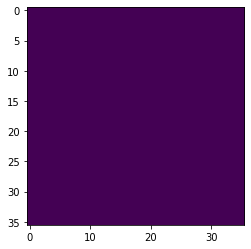

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[3.5290394e-04 9.9964714e-01]] loss: [0.01998957]
------------------------------------------------------------
clfs true: 0 pred: [[0.00285391 0.00575035 0.31729522 0.01328844 0.07910929 0.06525455
  0.05267221 0.0357719  0.3369786  0.09102549]] loss: [5.8590646]
------------------------------------------------------------
mse true: (111, 94, 28, 28)
mse pred: [[43.14073   33.72637   -1.2782038  3.6105537]] loss [2422.4622]


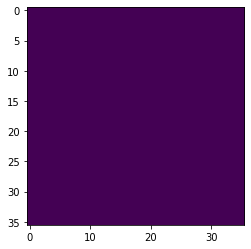

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[3.6369753e-04 9.9963629e-01]] loss: [0.02055902]
------------------------------------------------------------
clfs true: 2 pred: [[0.00251439 0.00499882 0.32842284 0.01194423 0.07359439 0.05958037
  0.0495112  0.03342387 0.34593806 0.09007181]] loss: [1.1134534]
------------------------------------------------------------
mse true: (103, 80, 28, 28)
mse pred: [[45.750835  36.498455  -1.5188283  3.1079195]] loss [1665.207]


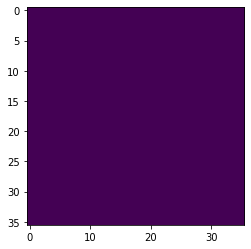

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[3.7578589e-04 9.9962413e-01]] loss: [0.02118168]
------------------------------------------------------------
clfs true: 8 pred: [[0.00222666 0.00438361 0.33903    0.01080268 0.06871139 0.05460979
  0.04656468 0.0313277  0.3535402  0.08880324]] loss: [1.039758]
------------------------------------------------------------
mse true: (82, 67, 28, 28)
mse pred: [[48.35262   39.27022   -1.7790388  2.5960107]] loss [858.3102]


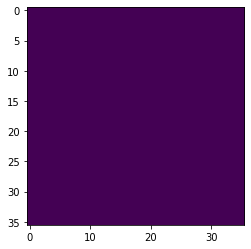

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[5.699163e-04 9.994300e-01]] loss: [0.02611865]
------------------------------------------------------------
clfs true: 9 pred: [[0.00225928 0.0042607  0.35194573 0.01050414 0.06442111 0.05012563
  0.04398612 0.03050993 0.3497673  0.09222002]] loss: [2.383578]
------------------------------------------------------------
mse true: (25, 20, 28, 28)
mse pred: [[28.200397  16.158432   2.2762609  8.929906 ]] loss [262.59485]


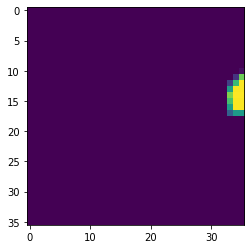

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.00365242 0.9963476 ]] loss: [2.8680916]
------------------------------------------------------------
clfs true: 8 pred: [[0.00374558 0.00600137 0.37129924 0.01288145 0.06270509 0.04552565
  0.04286538 0.03407409 0.30778298 0.1131191 ]] loss: [1.1783602]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[30.38299   19.01872    1.1760918  8.102968 ]] loss [1147.491]


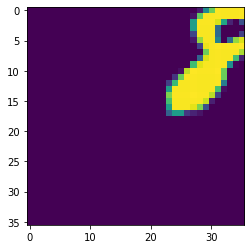

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.0221047 0.9778953]] loss: [2.0431898]
------------------------------------------------------------
clfs true: 8 pred: [[0.00706298 0.00947593 0.35879472 0.01769881 0.06763893 0.0477088
  0.04720873 0.04185496 0.26516503 0.13739116]] loss: [1.3274028]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[32.4544     21.829906   -0.17227498  7.2353673 ]] loss [1085.4034]


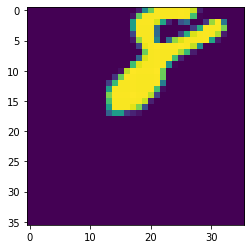

Sliced image shape: (36, 36, 1)
confidence true: 1 pred: [[0.02170019 0.97829986]] loss: [2.0525427]
------------------------------------------------------------
clfs true: 8 pred: [[0.00713685 0.00942695 0.34605792 0.01847054 0.07217299 0.04991396
  0.05066277 0.04279342 0.26851648 0.1348481 ]] loss: [1.3148429]
------------------------------------------------------------
mse true: [41 77 28 28]
mse pred: [[34.950264  24.536707  -0.6368984  6.671762 ]] loss [1015.99054]


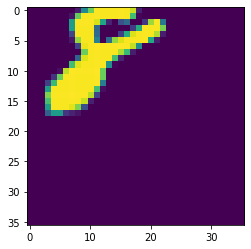

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00721478 0.9927852 ]] loss: [0.09353424]
------------------------------------------------------------
clfs true: 8 pred: [[0.00302426 0.0042562  0.38717067 0.0103468  0.05699043 0.03609373
  0.03939581 0.03093475 0.31697518 0.11481217]] loss: [1.1489317]
------------------------------------------------------------
mse true: (105, 64, 28, 28)
mse pred: [[38.12664   27.290918   0.263918   6.5603786]] loss [1762.1376]


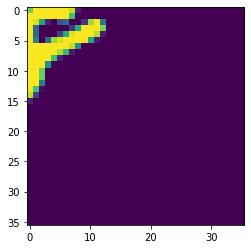

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.0107264 0.9892736]] loss: [0.11767529]
------------------------------------------------------------
clfs true: 7 pred: [[0.00221927 0.00289083 0.4196256  0.00753413 0.04684747 0.02641757
  0.03230404 0.0260884  0.32111633 0.11495631]] loss: [3.6462646]
------------------------------------------------------------
mse true: (54, 103, 28, 28)
mse pred: [[40.934868   30.113722    0.39746818  6.201545  ]] loss [1680.0449]


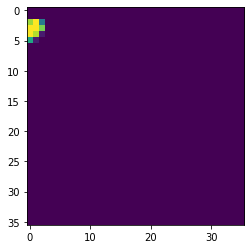

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.02081498 0.97918504]] loss: [0.16286787]
------------------------------------------------------------
clfs true: 6 pred: [[0.00217966 0.00261462 0.43538463 0.00686739 0.04295009 0.02247291
  0.02962999 0.0249972  0.31248662 0.12041688]] loss: [3.518968]
------------------------------------------------------------
mse true: (79, 58, 28, 28)
mse pred: [[43.495857   32.90963     0.04709063  5.6628394 ]] loss [792.5962]


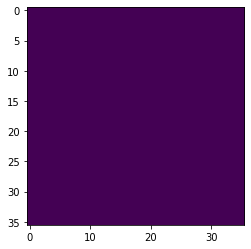

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.03753707 0.9624629 ]] loss: [0.2146651]
------------------------------------------------------------
clfs true: 4 pred: [[0.00224333 0.00250408 0.4467769  0.00658306 0.0406297  0.02004185
  0.02795068 0.02452451 0.30264792 0.12609796]] loss: [3.2032557]
------------------------------------------------------------
mse true: (111, 57, 28, 28)
mse pred: [[46.008953   35.69175    -0.40119115  5.0873117 ]] loss [1502.374]


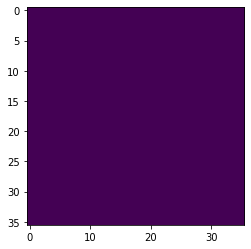

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.05758409 0.9424159 ]] loss: [0.26056919]
------------------------------------------------------------
clfs true: 4 pred: [[0.00227318 0.00240605 0.45620623 0.00633109 0.03874068 0.01832279
  0.02657149 0.0240582  0.29487738 0.1302129 ]] loss: [3.2508652]
------------------------------------------------------------
mse true: (92, 30, 28, 28)
mse pred: [[48.525845   38.46123    -0.84866655  4.510678  ]] loss [836.39716]


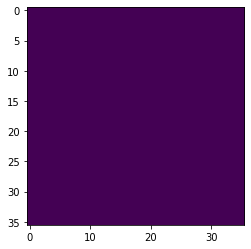

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.07509973 0.9249003 ]] loss: [0.29226372]
------------------------------------------------------------
clfs true: 6 pred: [[0.00226254 0.00231261 0.46377355 0.00611626 0.03726076 0.01714075
  0.0254472  0.02359211 0.28951734 0.13257682]] loss: [3.6711497]
------------------------------------------------------------
mse true: (105, 81, 28, 28)
mse pred: [[51.044052  41.21842   -1.2938131  3.9317431]] loss [1482.8066]


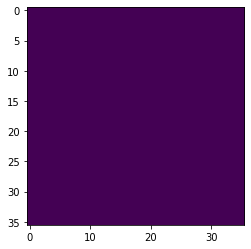

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.08871654 0.9112835 ]] loss: [0.31104556]
------------------------------------------------------------
clfs true: 3 pred: [[0.00231903 0.00232849 0.46935368 0.00616488 0.03653473 0.01669328
  0.02468509 0.0234846  0.28362453 0.13481161]] loss: [5.088887]
------------------------------------------------------------
mse true: (48, 53, 28, 28)
mse pred: [[30.856674  18.06115    2.6787171 10.224694 ]] loss [617.93646]


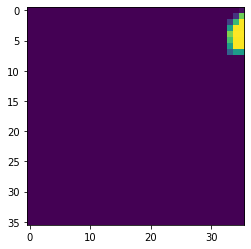

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.10254818 0.8974518 ]] loss: [0.3247043]
------------------------------------------------------------
clfs true: 6 pred: [[0.00267959 0.00269701 0.46623114 0.00687545 0.03774796 0.01784227
  0.02537405 0.02472257 0.2770198  0.13881014]] loss: [3.6740282]
------------------------------------------------------------
mse true: (26, 79, 28, 28)
mse pred: [[33.215374  20.778944   1.9332663  9.514504 ]] loss [1115.7352]


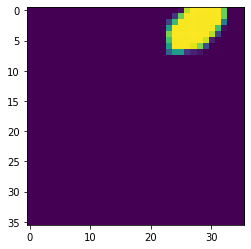

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.10383223 0.89616776]] loss: [0.32068044]
------------------------------------------------------------
clfs true: 0 pred: [[0.00289439 0.00291779 0.46223333 0.00730352 0.0390122  0.01894392
  0.02626745 0.02570185 0.27480254 0.13992295]] loss: [5.8449817]
------------------------------------------------------------
mse true: (72, 46, 28, 28)
mse pred: [[35.65395   23.49531    1.3095242  8.880263 ]] loss [726.36053]


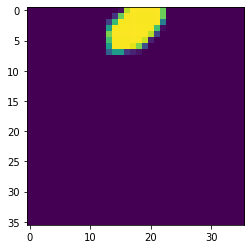

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.06963894 0.9303611 ]] loss: [0.2626317]
------------------------------------------------------------
clfs true: 8 pred: [[0.00268105 0.0028138  0.4579258  0.00729174 0.03989148 0.01974833
  0.0269804  0.02530096 0.28380045 0.133566  ]] loss: [1.2594838]
------------------------------------------------------------
mse true: (26, 25, 28, 28)
mse pred: [[38.18312   26.194937   0.9066678  8.312374 ]] loss [317.8769]


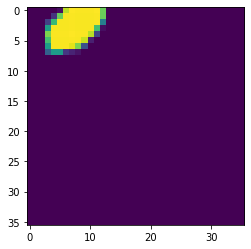

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.04072589 0.95927405]] loss: [0.20398337]
------------------------------------------------------------
clfs true: 4 pred: [[0.00181066 0.00196569 0.47535583 0.00552218 0.03426037 0.01670401
  0.02320605 0.02131672 0.29784697 0.12201158]] loss: [3.3737662]
------------------------------------------------------------
mse true: (57, 35, 28, 28)
mse pred: [[40.968315  28.947954   1.0017215  7.9266725]] loss [356.37192]


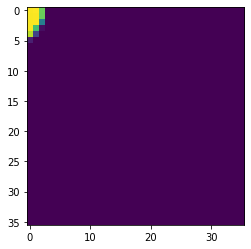

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.02409806 0.9759019 ]] loss: [0.15667412]
------------------------------------------------------------
clfs true: 9 pred: [[0.00162656 0.0018742  0.47139713 0.00539477 0.03416542 0.01746629
  0.02329799 0.02074714 0.30880055 0.11522989]] loss: [2.1608262]
------------------------------------------------------------
mse true: (53, 16, 28, 28)
mse pred: [[43.500233  31.642838   0.6085545  7.3504815]] loss [377.90945]


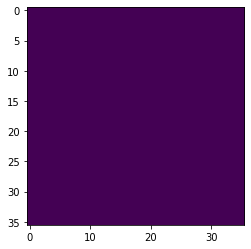

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.01498528 0.98501474]] loss: [0.12287684]
------------------------------------------------------------
clfs true: 9 pred: [[0.00149823 0.00182211 0.4677077  0.00532337 0.03414575 0.01831114
  0.02343129 0.02027701 0.3177418  0.10974158]] loss: [2.209627]
------------------------------------------------------------
mse true: (65, 57, 28, 28)
mse pred: [[46.019917   34.3409      0.18148097  6.76682   ]] loss [524.59906]


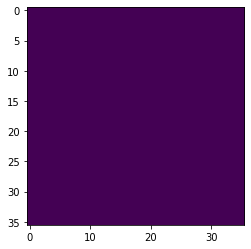

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00908605 0.990914  ]] loss: [0.09517636]
------------------------------------------------------------
clfs true: 0 pred: [[0.00137823 0.00177374 0.46331516 0.0052581  0.03418134 0.01927229
  0.02360428 0.01982217 0.32709503 0.10429966]] loss: [6.5869565]
------------------------------------------------------------
mse true: (18, 103, 28, 28)
mse pred: [[48.539295   37.036537   -0.24692813  6.182301  ]] loss [1639.432]


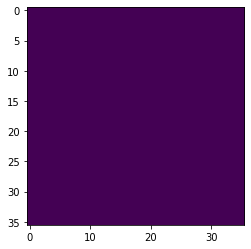

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00546016 0.9945398 ]] loss: [0.07343462]
------------------------------------------------------------
clfs true: 0 pred: [[0.00126859 0.00172887 0.45837083 0.00519918 0.03425334 0.02031655
  0.02380409 0.01938838 0.33660588 0.09906428]] loss: [6.6698503]
------------------------------------------------------------
mse true: (104, 104, 28, 28)
mse pred: [[51.05761   39.73084   -0.6775092  5.596582 ]] loss [2064.4336]


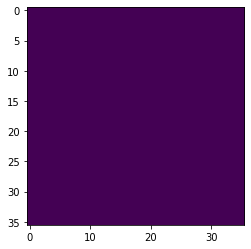

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00329348 0.99670655]] loss: [0.05682246]
------------------------------------------------------------
clfs true: 0 pred: [[0.00116935 0.00168641 0.45310113 0.00514345 0.034339   0.02140731
  0.02400649 0.01897043 0.34605107 0.09412536]] loss: [6.751304]
------------------------------------------------------------
mse true: (74, 79, 28, 28)
mse pred: [[53.575027  42.42467   -1.1101717  5.009737 ]] loss [782.7221]


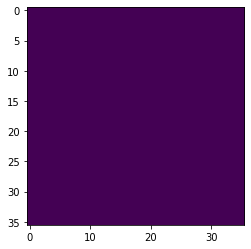

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00201256 0.9979874 ]] loss: [0.04431304]
------------------------------------------------------------
clfs true: 2 pred: [[0.00108057 0.00164648 0.44768316 0.00509043 0.03442931 0.022522
  0.0242062  0.01857173 0.35523814 0.08953208]] loss: [0.8036696]
------------------------------------------------------------
mse true: (21, 27, 28, 28)
mse pred: [[33.431274  19.217148   2.9561791 11.335276 ]] loss [280.00385]


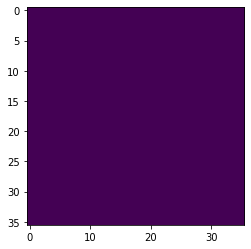

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[0.00126118 0.9987388 ]] loss: [0.03504311]
------------------------------------------------------------
clfs true: 2 pred: [[0.00100106 0.00160808 0.44282824 0.00503995 0.03452359 0.02359201
  0.02441408 0.0181772  0.36354667 0.08526916]] loss: [0.8145733]
------------------------------------------------------------
mse true: (86, 105, 28, 28)
mse pred: [[35.949055  21.908304   2.5186782 10.745153 ]] loss [2589.0889]


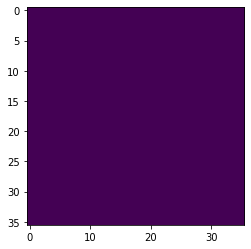

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[8.0803892e-04 9.9919194e-01]] loss: [0.02806224]
------------------------------------------------------------
clfs true: 1 pred: [[0.00093108 0.0015726  0.4379617  0.00499266 0.0346209  0.02465654
  0.02461578 0.01781105 0.37145257 0.08138514]] loss: [6.4550266]
------------------------------------------------------------
mse true: (95, 78, 28, 28)
mse pred: [[38.46537   24.6003     2.0778885 10.153755 ]] loss [1759.5342]


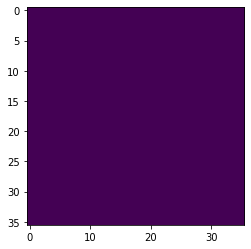

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[5.301999e-04 9.994698e-01]] loss: [0.02277104]
------------------------------------------------------------
clfs true: 2 pred: [[0.00086964 0.00154004 0.4331418  0.00494908 0.03472092 0.02570928
  0.02481092 0.01747284 0.37892893 0.0778566 ]] loss: [0.8366901]
------------------------------------------------------------
mse true: (64, 101, 28, 28)
mse pred: [[40.980125  27.293259   1.6336647  9.561103 ]] loss [1749.4436]


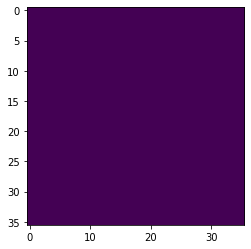

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[3.5667076e-04 9.9964333e-01]] loss: [0.01872937]
------------------------------------------------------------
clfs true: 5 pred: [[0.0008156  0.00151002 0.42846456 0.00490857 0.03481796 0.02673797
  0.02499251 0.01715813 0.3859357  0.07465895]] loss: [3.6216707]
------------------------------------------------------------
mse true: (68, 16, 28, 28)
mse pred: [[43.493404  29.987406   1.1862708  8.967399 ]] loss [469.35916]


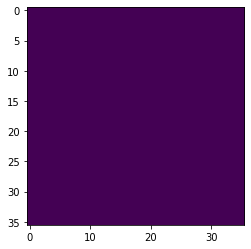

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[2.4611902e-04 9.9975389e-01]] loss: [0.01561552]
------------------------------------------------------------
clfs true: 6 pred: [[0.00076813 0.0014824  0.42396444 0.00487068 0.03490954 0.02773385
  0.02516175 0.01686741 0.39246997 0.07177176]] loss: [3.6824303]
------------------------------------------------------------
mse true: (42, 46, 28, 28)
mse pred: [[46.005272  32.682823   0.7358786  8.372642 ]] loss [330.4887]


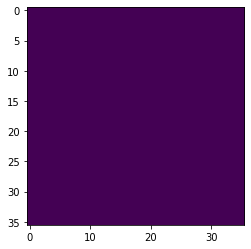

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[1.7415217e-04 9.9982589e-01]] loss: [0.01319209]
------------------------------------------------------------
clfs true: 1 pred: [[0.00072633 0.00145695 0.41967285 0.00483508 0.0349928  0.02868997
  0.02531709 0.01659844 0.3985402  0.06917028]] loss: [6.5314116]
------------------------------------------------------------
mse true: (36, 39, 28, 28)
mse pred: [[48.515842   35.37961     0.28271255  7.776953  ]] loss [336.7433]


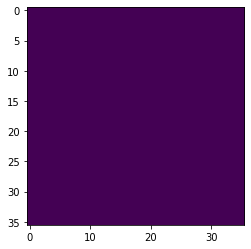

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[1.2626058e-04 9.9987376e-01]] loss: [0.01128578]
------------------------------------------------------------
clfs true: 9 pred: [[0.00068948 0.00143352 0.41560477 0.00480169 0.03506814 0.02960311
  0.02545924 0.01635009 0.4041624  0.06682754]] loss: [2.70564]
------------------------------------------------------------
mse true: (98, 75, 28, 28)
mse pred: [[51.025166   38.07774    -0.17307988  7.1803966 ]] loss [1199.2667]


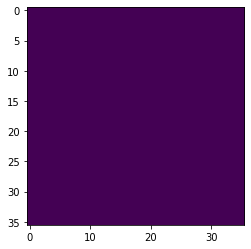

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[9.369397e-05 9.999063e-01]] loss: [0.00977036]
------------------------------------------------------------
clfs true: 7 pred: [[0.00065693 0.00141198 0.41176742 0.00477046 0.03513614 0.03047121
  0.02558902 0.0161212  0.40935737 0.06471819]] loss: [4.1276197]
------------------------------------------------------------
mse true: (100, 100, 28, 28)
mse pred: [[53.533325  40.777176  -0.6313461  6.583031 ]] loss [1736.2338]


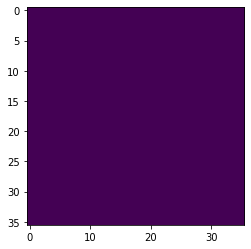

Sliced image shape: (36, 36, 1)
confidence true: 0 pred: [[7.1081333e-05 9.9992895e-01]] loss: [0.00855336]
------------------------------------------------------------
clfs true: 1 pred: [[0.00062814 0.0013922  0.40816227 0.00474132 0.0351976  0.0312933
  0.0257074  0.01591063 0.41414842 0.06281877]] loss: [6.57687]
------------------------------------------------------------
mse true: (110, 33, 28, 28)
mse pred: [[56.040382  43.47786   -1.0919355  5.984912 ]] loss [1088.1077]


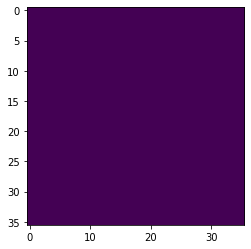

In [109]:
for x,y in zip(imgs, labels):
    step(x,y, debug=True)
    break

#kiedy jest cyfra
    cyfry powinny być posortowane
    jeśli współrzędne są w kwadracie dodaj właściwy label
    predykcja confidence
    strata dla regresji powinna być mała
    klasyfikacja


#kiedy nie ma cyfry
    współrzędne nie są w kwadracie dodaj random label
    predykcja confidence
    nie liczymy straty regresji i klasyfikacji

In [82]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Concatenate

inp = Input([36,36,1], name='inp')
coor = Input([2,], name='coor')
x = inp
x = Conv2D(16, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)

clfs = Dense(10, activation="softmax", name='clfs')(x)
confidence = Dense(2, activation="softmax", name='conf')(x)

#y = Dense(128, name='y')(coor)
x = Concatenate(axis=-1)([x, coor])
print(x.shape)
reg = Dense(4, activation="linear", name='reg')(x)

model = Model(inputs=[inp, coor], outputs=[clfs, confidence, reg])

(None, 130)


In [61]:
model.summary()

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_58 (InputLayer)           [(None, 36, 36, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 36, 36, 16)   160         input_58[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_87 (MaxPooling2D) (None, 18, 18, 16)   0           conv2d_116[0][0]                 
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 18, 18, 32)   4640        max_pooling2d_87[0][0]           
___________________________________________________________________________________________

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam', loss=[SparseCategoricalCrossentropy(from_logits=True),
                                      "binary_crossentropy",
                                      'mse'])

In [59]:
X = tf.random.uniform(shape=(1, 224, 224, 1))
for layer in model.layers:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

InputLayer output shape:	 (1, 224, 224, 1)
Conv2D output shape:	 (1, 224, 224, 16)
MaxPooling2D output shape:	 (1, 112, 112, 16)
Conv2D output shape:	 (1, 112, 112, 32)
MaxPooling2D output shape:	 (1, 56, 56, 32)
Conv2D output shape:	 (1, 56, 56, 64)
MaxPooling2D output shape:	 (1, 28, 28, 64)
Conv2D output shape:	 (1, 28, 28, 128)
Flatten output shape:	 (1, 100352)


ValueError: ignored